# KDD Fall 2020 - COVID-19 Project

## Team Members
Rohit Alavala (800952197)

Sai Bharadwaj Reddy (801166672)

Amruta Deshmukh (801217189)

Rishant Dutt (801104239)

## Project Introduction

### In this project we are predicting the mortality rate for different counties in each state of the United States of America based on median household income, unemployment rate, poverty rate, white alone %, black alone %, asian alone %, hispanic %.

### Steps followed are:
##### 1. Data Preparation
##### 2. Data Description
##### 3. Data Cleaning and pre-processing
##### 4. Exploratory Data Analysis

## Date Preparation

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required dataset
covid_state_data = pd.read_csv('state_data.csv')
covid_state_data.columns = covid_state_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', '').str.replace('/', '_')

## Data Description

In [3]:
# Checking for the number of rows and columns in a dataset.
covid_state_data.shape

(2959, 22)

In [4]:
# Getting all the information of the dataset like datatype,not null values..
covid_state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   unnamed:_0                          2959 non-null   int64  
 1   state                               2959 non-null   object 
 2   fips                                2959 non-null   int64  
 3   county                              2959 non-null   object 
 4   population_2018                     2959 non-null   int64  
 5   median_household_income_2018_$      2959 non-null   int64  
 6   unemployment_rate_2018_             2959 non-null   float64
 7   poverty_2018_                       2959 non-null   float64
 8   confirmed_cases                     2959 non-null   int64  
 9   confirmed_deaths                    2959 non-null   int64  
 10  confirmed_cases_per_100,000_people  2959 non-null   float64
 11  deaths_per_100,000_people           2959 no

In the dataset State and County has datatype as object. Some columns like FIPS, Median Household Income 2018($), Unemployment Rate 2018, Confirmed Cases, Confirmed Deaths have datatype as integer. and remaining all coumns have the datatype as float.

In [5]:
# Listing all the columns of the dataset
covid_state_data.columns

Index(['unnamed:_0', 'state', 'fips', 'county', 'population_2018',
       'median_household_income_2018_$', 'unemployment_rate_2018_',
       'poverty_2018_', 'confirmed_cases', 'confirmed_deaths',
       'confirmed_cases_per_100,000_people', 'deaths_per_100,000_people',
       'mortality_rate_', 'white_alone_', 'black_alone_',
       'native_american_alone_', 'asian_alone_', 'hispanic_',
       'less_than_a_high_school_diploma_', 'only_a_high_school_diploma_',
       'some_college_associate's_degree_', 'bachelor's_degree_or_higher_'],
      dtype='object')

In [6]:
# Counting number of states and number of counties in the dataset
number_of_states = pd.unique(covid_state_data['state'])
number_of_counties = pd.unique(covid_state_data['county'])
print("Number of States :",len(number_of_states))
print("Number of Counties :",len(number_of_counties))


Number of States : 51
Number of Counties : 1741


In [7]:
# Checking the statistical summary of the dataset 
covid_state_data.describe()

,unnamed:_0,fips,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
count,2959.000000,2959.000000,2.959000e+03,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,1479.000000,30267.689084,1.076076e+05,52907.030416,4.138560,15.220953,612.245015,35.390673,345.211504,13.872305,3.458911,84.229755,9.784947,2.187493,1.571278,9.614081,13.531869,34.284589,30.560088,21.622237
std,854.334049,15216.579589,3.355405e+05,14025.941509,1.442719,6.174689,4647.469021,425.977048,672.040361,36.845776,5.261766,16.255690,14.710205,7.267710,2.783350,13.748744,6.244929,7.212705,5.055190,9.545845
min,0.000000,1001.000000,4.620000e+02,25385.000000,1.300000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,5.325320,0.000000,0.000000,0.000000,0.610451,1.200000,5.500000,11.400000,5.400000
25%,739.500000,18142.000000,1.269400e+04,43665.000000,3.200000,10.800000,12.000000,0.000000,66.270542,0.000000,0.000000,78.903678,0.935071,0.377409,0.474314,2.403604,8.850000,29.900000,27.200000,14.900000
50%,1479.000000,29111.000000,2.820400e+04,50587.000000,3.900000,14.200000,47.000000,1.000000,153.771979,2.899475,1.685393,90.911038,2.855236,0.615064,0.758277,4.430390,12.200000,34.600000,30.500000,19.200000
75%,2218.500000,45058.000000,7.313150e+04,59011.500000,4.800000,18.400000,211.000000,7.000000,372.358983,12.881857,5.263158,95.414974,11.683090,1.269921,1.478203,9.998449,17.400000,39.300000,34.000000,25.800000
max,2958.000000,56045.000000,1.007391e+07,140382.000000,18.900000,54.000000,204377.000000,21649.000000,12652.950240,1328.929962,100.000000,99.043785,86.069762,92.515200,42.952310,96.359551,48.500000,55.600000,48.000000,78.500000


In [8]:
# Printing first 10 rows of the dataset
covid_state_data.head(10)

,unnamed:_0,state,fips,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,...,mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,0,Alabama,1001,Autauga,55533,59338,3.6,13.8,239,5,...,2.092050,76.725239,19.630942,0.480207,1.224798,2.965774,11.3,32.6,28.4,27.7
1,1,Alabama,1003,Baldwin,217855,57588,3.6,9.8,292,9,...,3.082192,87.285228,8.940382,0.772399,1.150343,4.646779,9.7,27.6,31.3,31.3
2,2,Alabama,1005,Barbour,24872,34382,5.1,30.9,175,1,...,0.571429,49.069571,48.398376,0.659137,0.454162,4.276355,27.0,35.7,25.1,12.2
3,3,Alabama,1007,Bibb,22367,46064,3.9,21.8,76,1,...,1.315789,76.834821,21.294643,0.437500,0.236607,2.625000,16.8,47.3,24.4,11.5
4,4,Alabama,1009,Blount,57771,50412,3.5,13.2,63,1,...,1.587302,95.878285,1.642462,0.653527,0.319848,9.571231,19.8,34.0,33.5,12.6
5,5,Alabama,1011,Bullock,10174,29267,4.6,42.5,213,6,...,2.816901,26.247781,70.704281,0.838430,0.187414,7.960150,24.8,39.7,22.3,13.3
6,6,Alabama,1013,Butler,19631,37365,4.7,24.5,416,18,...,4.326923,52.251016,44.913618,0.376016,1.316057,1.509146,15.4,43.9,24.6,16.1
7,7,Alabama,1015,Calhoun,114331,45400,4.6,19.5,165,3,...,1.818182,75.278490,21.135487,0.539916,0.964324,3.910673,15.9,32.4,33.7,18.0
8,8,Alabama,1017,Chambers,33600,39917,3.8,18.7,358,26,...,7.262570,57.063811,40.000000,0.306411,1.326789,2.561357,18.6,38.4,29.7,13.2
9,9,Alabama,1019,Cherokee,26014,42132,3.5,16.3,38,3,...,7.894737,93.027812,4.260141,0.660725,0.338045,1.621082,19.8,38.3,29.0,12.9


## Data Cleaning and Pre-processing

#### Checking if any duplicate rows present in the data

In [9]:
duplicate_df = covid_state_data[covid_state_data.duplicated()]
print('Duplicate Rows: ', duplicate_df.shape[0])

Duplicate Rows:  0


There are no duplicate rows in the dataset.

#### Looking for the missing values in the dataset

In [10]:
# Check for nulls in the dataset and count for the number of null values
covid_state_data.isna().sum()

unnamed:_0                            0
state                                 0
fips                                  0
county                                0
population_2018                       0
median_household_income_2018_$        0
unemployment_rate_2018_               0
poverty_2018_                         0
confirmed_cases                       0
confirmed_deaths                      0
confirmed_cases_per_100,000_people    0
deaths_per_100,000_people             0
mortality_rate_                       0
white_alone_                          0
black_alone_                          0
native_american_alone_                0
asian_alone_                          0
hispanic_                             0
less_than_a_high_school_diploma_      0
only_a_high_school_diploma_           0
some_college_associate's_degree_      0
bachelor's_degree_or_higher_          0
dtype: int64

There is no missing data in the dataset.

###### Data Reduction - Dropping the columns Unnamed:0 and FIPS because they do not specify much details

In [11]:
covid_state_data = covid_state_data.drop(['unnamed:_0'], axis=1)
covid_state_data = covid_state_data.drop(['fips'], axis=1)
# Listing all the columns of the dataset after removing columns - Unnamed:0 and FIPS
covid_state_data.columns

Index(['state', 'county', 'population_2018', 'median_household_income_2018_$',
       'unemployment_rate_2018_', 'poverty_2018_', 'confirmed_cases',
       'confirmed_deaths', 'confirmed_cases_per_100,000_people',
       'deaths_per_100,000_people', 'mortality_rate_', 'white_alone_',
       'black_alone_', 'native_american_alone_', 'asian_alone_', 'hispanic_',
       'less_than_a_high_school_diploma_', 'only_a_high_school_diploma_',
       'some_college_associate's_degree_', 'bachelor's_degree_or_higher_'],
      dtype='object')

#### Data Reduction - Rounding off the values to 3 digits

In [12]:
# Rounding off the data values of numeric fields to 3 digits.
covid_state_data = np.round(covid_state_data, decimals=3)
covid_state_data.head()

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
0,Alabama,Autauga,55533,59338,3.6,13.8,239,5,430.375,9.004,2.092,76.725,19.631,0.480,1.225,2.966,11.3,32.6,28.4,27.7
1,Alabama,Baldwin,217855,57588,3.6,9.8,292,9,134.034,4.131,3.082,87.285,8.940,0.772,1.150,4.647,9.7,27.6,31.3,31.3
2,Alabama,Barbour,24872,34382,5.1,30.9,175,1,703.602,4.021,0.571,49.070,48.398,0.659,0.454,4.276,27.0,35.7,25.1,12.2
3,Alabama,Bibb,22367,46064,3.9,21.8,76,1,339.786,4.471,1.316,76.835,21.295,0.438,0.237,2.625,16.8,47.3,24.4,11.5
4,Alabama,Blount,57771,50412,3.5,13.2,63,1,109.051,1.731,1.587,95.878,1.642,0.654,0.320,9.571,19.8,34.0,33.5,12.6


## Exploratory Data Analysis

#### Correlation Matrix for the Dataset
###### The following correlation table shows the correlation among all the features.

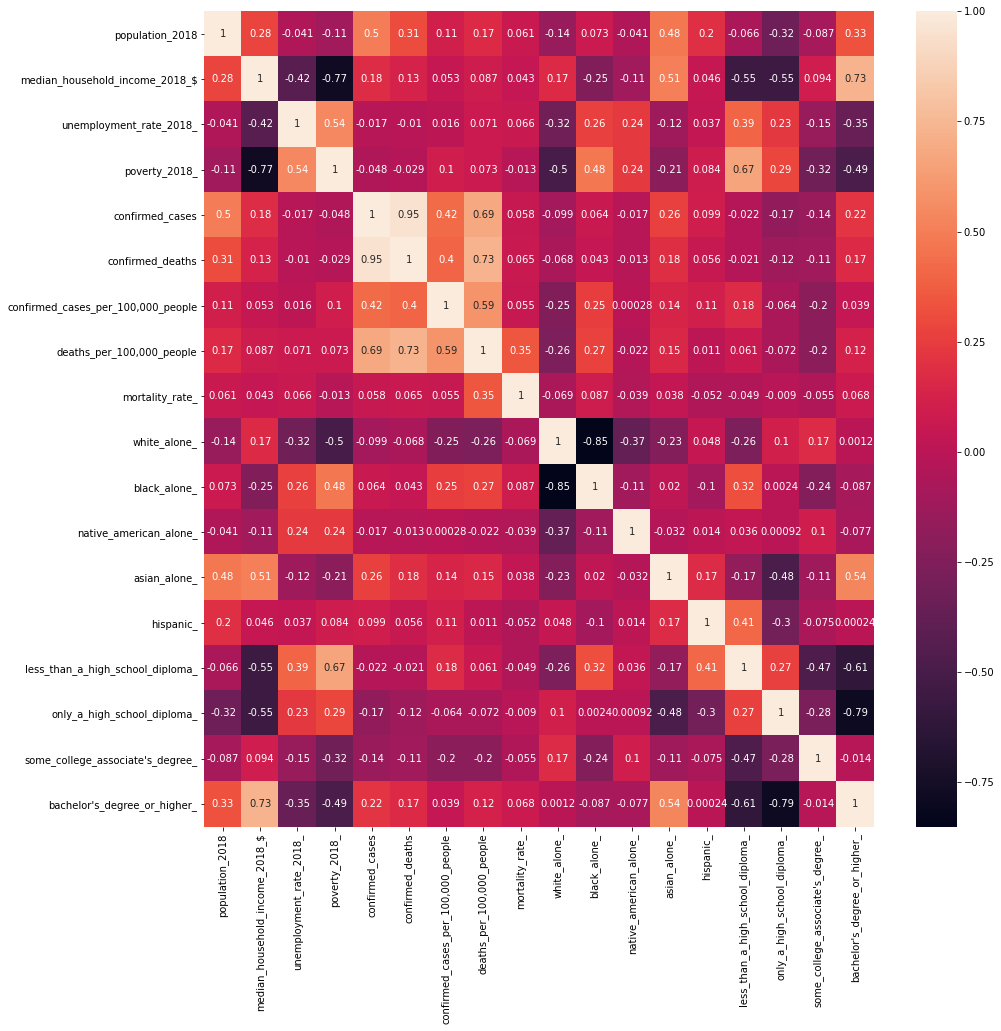

In [13]:
correlation=covid_state_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)
plt.show()

### There are lots of insights about the data from the above correlation matrix.

1) Poverty of the county is negatively correlated to the median household income of the county i.e; Higher the median household income, lower the poverty in that county.

2) Counties with higher "white only" population has lower "black only" population and vice-versa.

3) Counties with higher "white only" population is negatively coorelated to poverty, which is the complete opposite in the case of counties with "black only" population.

4) Unemployment is Positively correlated to the poverty i.e; higher the unemployment higher the poverty.

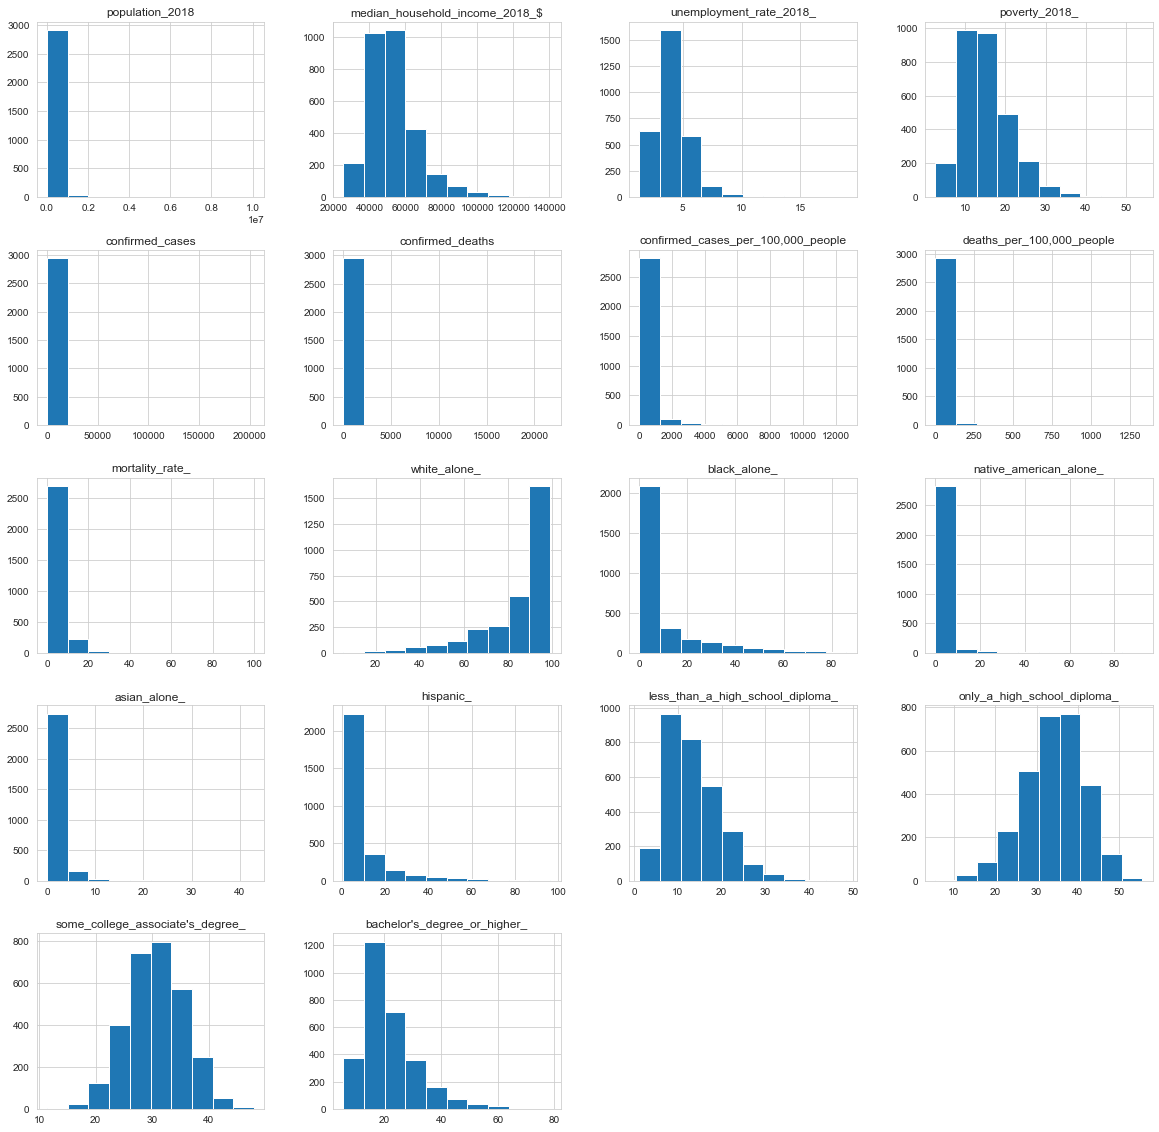

In [14]:
sns.set_style("whitegrid");
num=covid_state_data.select_dtypes(include=['int64','float64'])
num.hist(figsize=(20, 20))
plt.show() 

#### Lets see if there are any outliers across various columns

(To have an understanding of what we are dealing with)

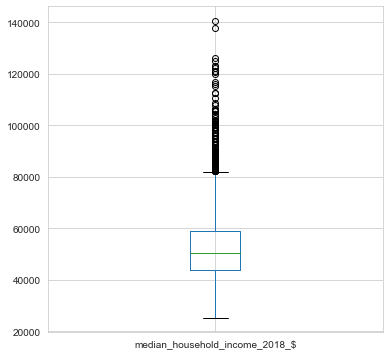

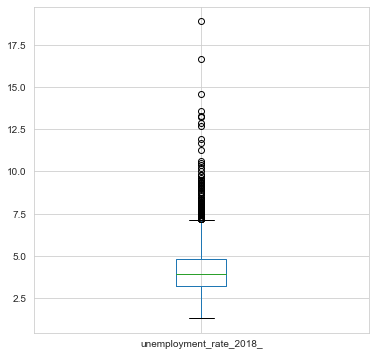

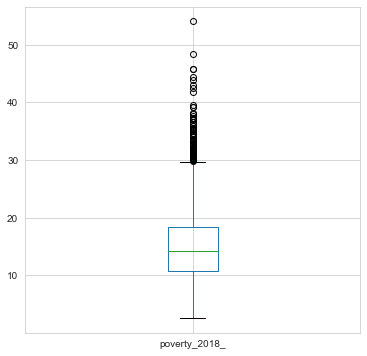

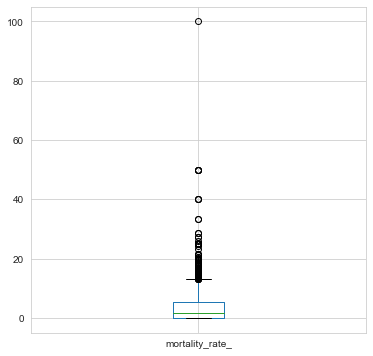

In [15]:
few_columns = ['median_household_income_2018_$',
       'unemployment_rate_2018_', 'poverty_2018_', 'mortality_rate_']
for i in few_columns:
    covid_state_data[str(i)].plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(6,6))
    plt.show() 

An outlier is a data point or value that differs considerably from all or most other data in a dataset. These won't make the model fail

There are outliers across all the columns which are plotted.

#### Lets look at the distribution on various columns

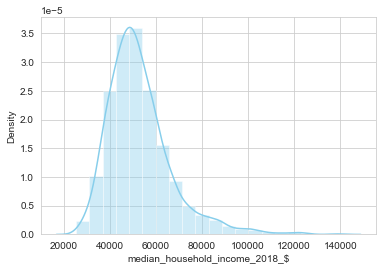

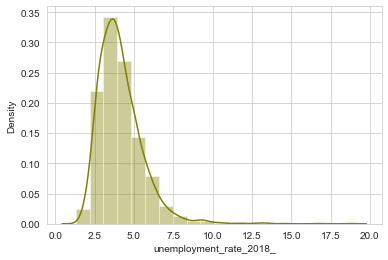

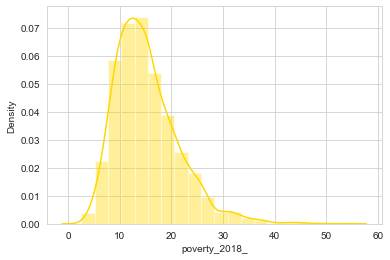

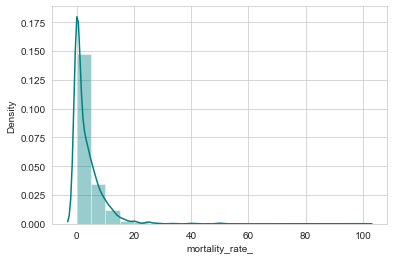

In [16]:
colors = ['skyblue', 'olive', 'gold', 'teal']
for i, j in enumerate(few_columns):
    sns.distplot( covid_state_data[str(j)], bins=20, color = str(colors[i]) )
    plt.show()

##### Lets look at counties with highest Mortality rate

In [17]:
county_mortality = covid_state_data.sort_values(by=['mortality_rate_'])
county_mortality = county_mortality[county_mortality['mortality_rate_'] != 0]
low_mortality = county_mortality.head(15)
high_mortality = county_mortality.tail(15)


In [18]:
high_mortality

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
237,Colorado,Chaffee,20041,56168,2.6,10.9,77,20,384.212,99.795,25.974,93.948,1.738,1.628,0.869,10.126,7.1,26.7,32.6,33.5
1346,Minnesota,Wilkin,6244,61387,3.0,9.4,11,3,176.169,48.046,27.273,95.539,0.640,1.807,0.432,3.102,6.1,29.7,40.7,23.5
1146,Maine,Waldo,39657,49482,3.4,13.7,51,14,128.603,35.303,27.451,96.546,0.627,0.496,0.708,1.499,7.6,32.6,30.3,29.6
2916,Wisconsin,Richland,17397,53050,2.6,14.3,14,4,80.474,22.992,28.571,96.829,0.794,0.478,0.783,2.440,10.0,40.9,30.2,18.9
2719,Virginia,Scott,21672,40161,3.3,18.5,7,2,32.300,9.228,28.571,97.697,0.822,0.288,0.190,1.426,18.8,37.2,29.6,14.4
2532,Texas,Martin,5681,56484,2.5,13.6,3,1,52.808,17.603,33.333,93.847,2.990,1.373,0.521,47.436,22.9,31.1,25.6,20.4
2867,Wisconsin,Bayfield,15026,53637,4.9,14.2,3,1,19.965,6.655,33.333,85.414,0.671,10.391,0.538,2.041,5.1,28.8,35.6,30.5
1205,Michigan,Dickinson,25371,52348,3.8,10.8,5,2,19.708,7.883,40.000,96.364,0.512,0.977,0.599,1.631,5.2,33.8,34.5,26.5
873,Kansas,Clay,8003,52681,3.1,10.7,5,2,62.477,24.991,40.000,95.986,0.938,0.638,0.525,2.513,7.0,29.8,36.0,27.2
2026,Oklahoma,Cotton,5820,43386,3.1,16.2,5,2,85.911,34.364,40.000,81.042,2.372,10.042,0.294,8.293,14.2,43.4,29.3,13.2


In [19]:
low_mortality

,state,county,population_2018,median_household_income_2018_$,unemployment_rate_2018_,poverty_2018_,confirmed_cases,confirmed_deaths,"confirmed_cases_per_100,000_people","deaths_per_100,000_people",mortality_rate_,white_alone_,black_alone_,native_american_alone_,asian_alone_,hispanic_,less_than_a_high_school_diploma_,only_a_high_school_diploma_,some_college_associate's_degree_,bachelor's_degree_or_higher_
771,Iowa,Buena Vista,19826,52683,2.2,10.2,852,1,4297.387,5.044,0.117,82.922,3.542,0.619,9.681,25.984,22.2,29.5,28.7,19.6
158,Arkansas,St. Francis,25509,33257,5.0,35.6,682,1,2673.566,3.920,0.147,43.980,52.942,0.786,0.637,5.444,19.4,38.8,31.2,10.6
2295,Tennessee,Bledsoe,14883,40195,6.0,26.7,609,1,4091.917,6.719,0.164,90.613,7.137,0.590,0.271,2.453,25.1,38.7,23.4,12.9
1623,Nebraska,Platte,33287,63656,2.8,8.5,603,1,1811.518,3.004,0.166,95.102,1.076,1.322,1.202,19.815,11.3,30.7,35.8,22.2
1297,Minnesota,Kandiyohi,42910,60579,3.0,11.5,504,1,1174.551,2.330,0.198,90.883,6.170,0.544,1.085,12.293,11.5,25.8,39.3,23.4
1627,Nebraska,Saline,14336,54569,3.1,12.4,506,1,3529.576,6.975,0.198,91.115,1.631,1.833,3.275,25.882,15.7,35.2,34.7,14.3
1585,Nebraska,Dodge,36725,51682,2.9,9.8,487,1,1326.072,2.723,0.205,94.371,1.288,1.538,0.747,13.367,10.7,36.3,34.5,18.6
936,Kansas,Seward,21902,50671,3.2,15.1,883,2,4031.595,9.132,0.227,88.182,5.032,1.680,2.994,61.988,31.8,30.6,26.4,11.1
1440,Missouri,Buchanan,88163,52506,2.9,15.6,719,2,815.535,2.269,0.278,88.475,5.956,0.735,1.618,6.886,11.8,37.0,30.5,20.7
2376,Tennessee,Trousdale,11033,49280,3.3,18.6,1396,4,12652.950,36.255,0.287,85.661,11.478,0.599,0.445,2.443,19.8,34.8,28.5,16.8


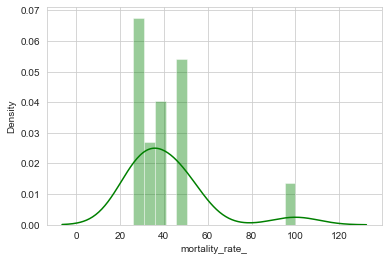

In [22]:
sns.distplot(a=high_mortality['mortality_rate_'] ,bins=15, color='Green')
plt.show()
#Below we can see the distribution of Mortality rate for Top counties.

##### Lets plot a heat_map for correlation in high_mortality and low_mortality dataframe

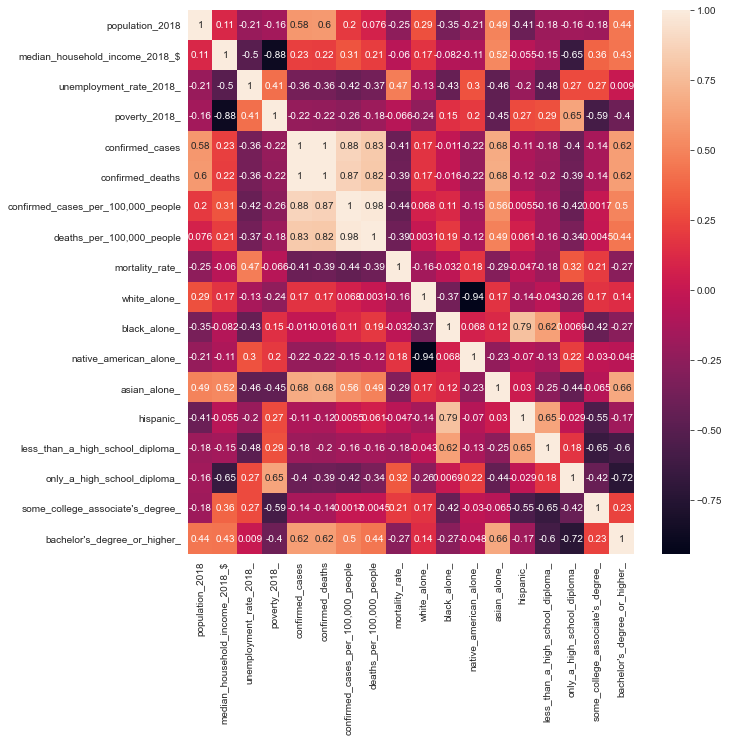

In [24]:
plt.figure(figsize=(10,10)) 
sns.heatmap(high_mortality.corr(), annot = True)
plt.show()

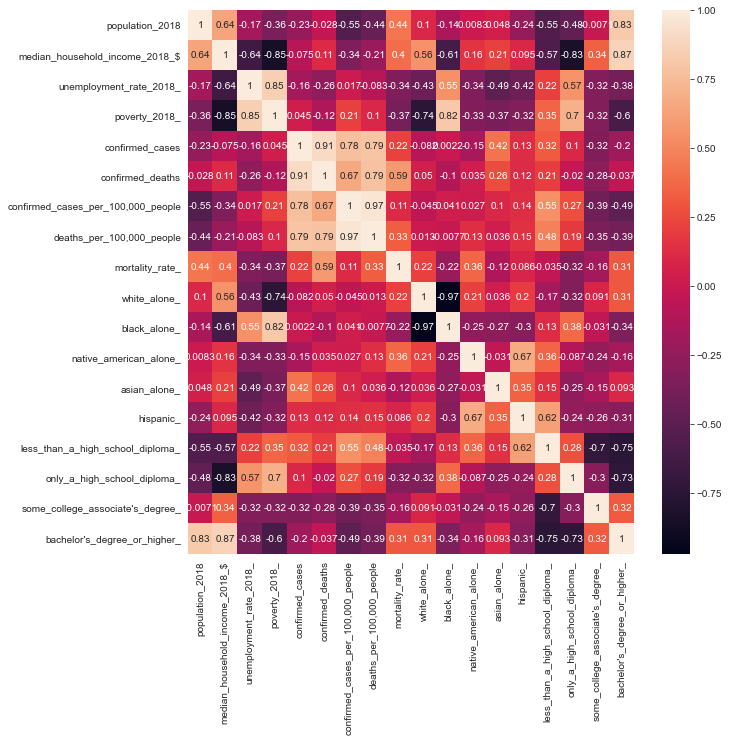

In [25]:
plt.figure(figsize=(10,10)) 
sns.heatmap(low_mortality.corr(), annot = True)
plt.show()

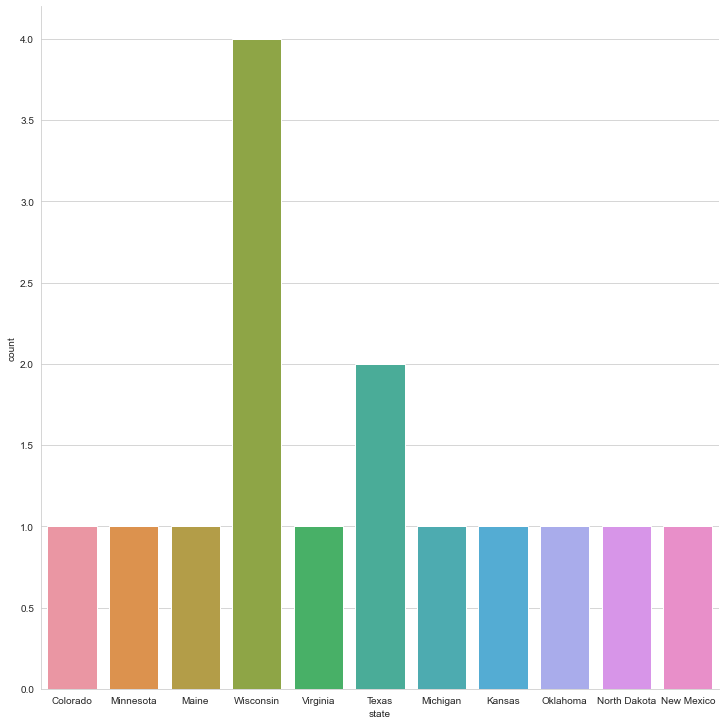

In [26]:
sns.catplot(x="state", kind = 'count',data= high_mortality , size = 10) 
plt.show()

From the above graph we can see that,
Wisconsin and Texas have 4, 2 counties respectively in the top 15 counties with high mortality rate

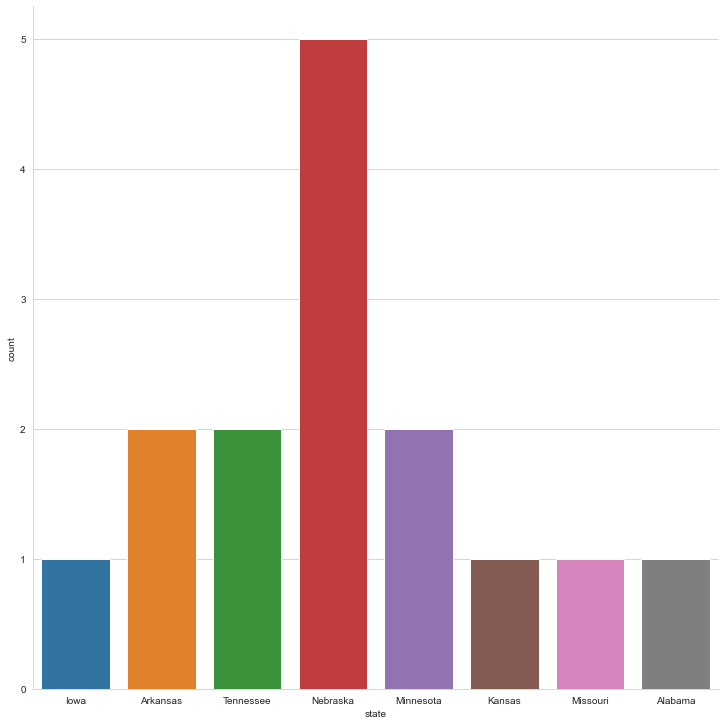

In [27]:
sns.catplot(x="state", kind = 'count',data= low_mortality , size = 10)
plt.show()

From the above graph we can see that,
Nebraska has 5 counties with the lowest mortality rate in the USA